In [3]:
from google.colab import files
files.upload()

Saving emprestimo_alto_baixo.csv to emprestimo_alto_baixo.csv


{'emprestimo_alto_baixo.csv': b'renda_mensal,divida_total,idade,risco\r\n5000,20000,1,ALTO\r\n3500,21000,2,ALTO\r\n5500,6000,3,BAIXO\r\n3000,30000,1,ALTO\r\n1500,8000,2,ALTO\r\n800,6000,2,ALTO\r\n4500,3000,2,BAIXO\r\n8000,7500,2,BAIXO\r\n9000,12000,3,ALTO\r\n10500,20000,1,BAIXO\r\n21000,35000,3,ALTO\r\n8700,11000,1,BAIXO\r\n11500,30000,1,ALTO\r\n10400,15000,1,BAIXO\r\n2000,6000,2,ALTO\r\n3000,15000,2,ALTO\r\n5500,12000,3,ALTO\r\n3000,4000,1,ALTO\r\n12000,20000,2,BAIXO\r\n1100,15000,1,ALTO\r\n4500,3000,3,BAIXO\r\n12000,8000,2,BAIXO\r\n9000,14000,3,ALTO\r\n10500,8500,2,BAIXO\r\n8500,11000,3,ALTO\r\n8700,25000,3,ALTO\r\n11500,15000,3,ALTO\r\n10400,16000,2,BAIXO\r\n'}

In [4]:
import pandas as pd
# A abertura pode ser a partir do drive
# vendas_rest = pd.read_csv('/content/drive/My Drive/IA/Dados_mineracao/dados_class_n.csv', sep=',')
# Ou pode ser aberto o arquivo que foi carregado para o buffer por upload
emprestimo_medio = pd.read_csv('emprestimo_alto_baixo.csv', sep=',')

In [3]:
print(emprestimo_medio.dtypes)
print(emprestimo_medio.head())
print(emprestimo_medio.shape)

renda_mensal     int64
divida_total     int64
idade            int64
risco           object
dtype: object
   renda_mensal  divida_total  idade  risco
0          5000         20000      1   ALTO
1          3500         21000      2   ALTO
2          5500          6000      3  BAIXO
3          3000         30000      1   ALTO
4          1500          8000      2   ALTO
(28, 4)


In [5]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


In [6]:
classificador_tree = tree.DecisionTreeClassifier(random_state=1, max_depth=10 )
numatributos = len(emprestimo_medio.columns) - 1
atributos = list(emprestimo_medio.columns[0:numatributos]) 

X = emprestimo_medio[atributos]
y = emprestimo_medio['risco']       

print(list(emprestimo_medio.columns[0:numatributos]))
print(X)
print(y)


['renda_mensal', 'divida_total', 'idade']
    renda_mensal  divida_total  idade
0           5000         20000      1
1           3500         21000      2
2           5500          6000      3
3           3000         30000      1
4           1500          8000      2
5            800          6000      2
6           4500          3000      2
7           8000          7500      2
8           9000         12000      3
9          10500         20000      1
10         21000         35000      3
11          8700         11000      1
12         11500         30000      1
13         10400         15000      1
14          2000          6000      2
15          3000         15000      2
16          5500         12000      3
17          3000          4000      1
18         12000         20000      2
19          1100         15000      1
20          4500          3000      3
21         12000          8000      2
22          9000         14000      3
23         10500          8500      2
24      

In [7]:
resultado = classificador_tree.fit(X, y)
#predicted = classificador_tree.predict(X)
predicted = cross_val_predict(classificador_tree, X, y, cv=10)

In [8]:
expected = y.values
print('Matriz de confusão')
print(confusion_matrix(expected, predicted))

print("\nEsperado:")
print(expected)
print("\n Previsto:")
print(predicted)

for esperado,previsto in zip(expected, predicted):
    print("{}->{}".format(esperado, previsto))

from sklearn.metrics import accuracy_score
print('\n Métricas')
print(classification_report(expected, predicted))
print('\n Acurácia')
print(accuracy_score(expected, predicted))

Matriz de confusão
[[15  2]
 [ 2  9]]

Esperado:
['ALTO' 'ALTO' 'BAIXO' 'ALTO' 'ALTO' 'ALTO' 'BAIXO' 'BAIXO' 'ALTO' 'BAIXO'
 'ALTO' 'BAIXO' 'ALTO' 'BAIXO' 'ALTO' 'ALTO' 'ALTO' 'ALTO' 'BAIXO' 'ALTO'
 'BAIXO' 'BAIXO' 'ALTO' 'BAIXO' 'ALTO' 'ALTO' 'ALTO' 'BAIXO']

 Previsto:
['BAIXO' 'ALTO' 'BAIXO' 'ALTO' 'ALTO' 'ALTO' 'ALTO' 'BAIXO' 'ALTO' 'BAIXO'
 'ALTO' 'BAIXO' 'BAIXO' 'BAIXO' 'ALTO' 'ALTO' 'ALTO' 'ALTO' 'ALTO' 'ALTO'
 'BAIXO' 'BAIXO' 'ALTO' 'BAIXO' 'ALTO' 'ALTO' 'ALTO' 'BAIXO']
ALTO->BAIXO
ALTO->ALTO
BAIXO->BAIXO
ALTO->ALTO
ALTO->ALTO
ALTO->ALTO
BAIXO->ALTO
BAIXO->BAIXO
ALTO->ALTO
BAIXO->BAIXO
ALTO->ALTO
BAIXO->BAIXO
ALTO->BAIXO
BAIXO->BAIXO
ALTO->ALTO
ALTO->ALTO
ALTO->ALTO
ALTO->ALTO
BAIXO->ALTO
ALTO->ALTO
BAIXO->BAIXO
BAIXO->BAIXO
ALTO->ALTO
BAIXO->BAIXO
ALTO->ALTO
ALTO->ALTO
ALTO->ALTO
BAIXO->BAIXO

 Métricas
              precision    recall  f1-score   support

        ALTO       0.88      0.88      0.88        17
       BAIXO       0.82      0.82      0.82        11

    accuracy

In [8]:
# Visualizar as features mais importantes
print(classificador_tree.feature_importances_)
for feature,importancia in zip(emprestimo_medio.columns,classificador_tree.feature_importances_):
    print("{}:{}".format(feature, importancia))

[0.31871658 0.34317507 0.33810836]
renda_mensal:0.318716577540107
divida_total:0.34317506616971855
idade:0.3381083562901745


risco


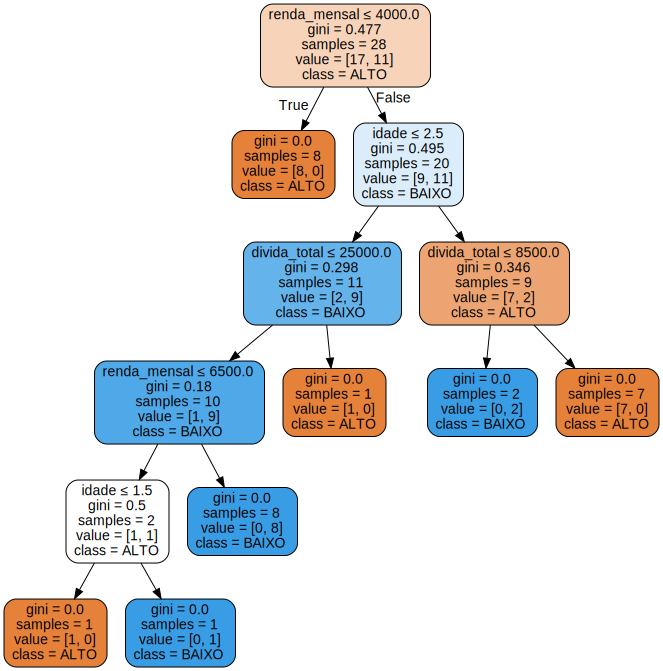

In [9]:
#tree.plot_tree(classificador_tree, feature_names=True)
print(y.name)
import graphviz 
dot_data = tree.export_graphviz(classificador_tree, out_file=None, feature_names=atributos, class_names=['ALTO', 'BAIXO'],filled=True, rounded=True, special_characters=True)  
#tree.export_graphviz()
graph = graphviz.Source(dot_data)  
graph 

Aplicar os métodos estudados no conjunto de dados anexados a esta tarefa.
Comparar os resultados (matriz confusão, recall, precision, acurácia) para os dois métodos.
Entregar os notebooks usados com comentários sobre os resultados.

R: A matriz de confusão abaixo nos mostra que a sua precisão de acertos foi quase 90%, sendo ela 88% para alto e 82% para baixo, em média sua acurácia ficou em 86%. O seu recall é o dado mais alto, sendo ele 0.88 para os altos e 0.82 para os baixos.
Métricas
              precision    recall  f1-score   support

        ALTO       0.88      0.88      0.88        17
       BAIXO       0.82      0.82      0.82        11

    accuracy                           0.86        28
   macro avg       0.85      0.85      0.85        28
weighted avg       0.86      0.86      0.86        28